# INFORMACIÓN DEL CUADERNO

**CUADERNO PARA EL TRABAJO DE TEORIA DE LA ASIGNATURA: SISTEMAS INTELIGENTES PARA LA GESTION DE EMPRESA, CORRESPONDIENTE AL MÁSTER DE INGENIERÍA INFORMÁTICA DE LA UNIVERSIDAD DE GRANADA**

* NOMBRE DEL TRABAJO: CLASIFICACIÓN DE IMÉGENES MÉDICAS
* AUTOR: ÁNGEL MURCIA DÍAZ
* FECHA: MAYO DE 2020

* ARTICULO WEB REFERENCIA PRINCIPAL: https://www.pyimagesearch.com/2020/03/16/detecting-covid-19-in-x-ray-images-with-keras-tensorflow-and-deep-learning/

## Pasos necesarios para la ejecución del cuaderno en Google Colab 

Para que pueda funcionar en Google Colab, en primer lugar, es necesario, conectar Google Colab a tu google Drive Personal.

También es necesario subir el conjunto de datos de imágenes proporcionado por el articulo web original a tu Google Drive personal.

Por último, es necesario colocarte en el directorio donde se encuentran los conjuntos de datos, usando el comando ls.

In [1]:
#CONECTAR CON TU CUENTA DE GOOGLE DRIVE

from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#CREAR EN LA RAIZ DE TU DRIVE LA CARPETA SIGE, DENTRO DE ESTA LA CARPETA TERORIA Y DENTRO SE DESCOMPRIME EL ZIP OBTENIDO DESDE EL ARTÍCULO WEB: 
#https://www.pyimagesearch.com/2020/03/16/detecting-covid-19-in-x-ray-images-with-keras-tensorflow-and-deep-learning/
#ENTRAR AL DIRECTORIO PARA TRABAJAR DESDE HAY
cd  /content/gdrive/My\ Drive/SIGE/TEORIA/

/content/gdrive/My Drive/SIGE/TEORIA


## SCRITP MODIFICADO POR MÍ

### PARTE DE LA CARGA Y PREPROCESAMIENTO DE IMAGENES

In [3]:
# USAGE
# python train.py --dataset dataset

# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os


DATASET = "dataset"
MODEL = "covid19.model"
PLOT =  "plot.png"

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 50
BS = 8

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images(DATASET))
data = []
labels = []

# loop over the image paths
for imagePath in imagePaths:
	print(imagePath)
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)

# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 255]
data = np.array(data) / 255.0
labels = np.array(labels)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

# initialize the training data augmentation object
trainAug = ImageDataGenerator(
  rotation_range = 20,
  zoom_range = 0.1,
  fill_mode = "nearest"
	)

[INFO] loading images...
dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg
dataset/covid/nejmoa2001191_f1-PA.jpeg
dataset/covid/nejmc2001573_f1a.jpeg
dataset/covid/ryct.2020200034.fig5-day7.jpeg
dataset/covid/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
dataset/covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
dataset/covid/ryct.2020200034.fig5-day0.jpeg
dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg
dataset/covid/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
dataset/covid/ryct.2020200034.fig5-day4.jpeg
dataset/covid/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg
dataset/covid/radiopedia-covid-19-pneumonia-2.jpg
dataset/covid/nCoV-radiol.2020200269.fig1-day7.jpeg
dataset/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg
dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg
dataset/covid/nejmoa2001191_f3-PA.jpeg
dataset/covid/lancet-

### PARTE DE LA CONSTRUCCIÓN, ENTRENAMIENTO Y VALIDACIÓN DEL MODELO PREDICTIVO

58892288/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

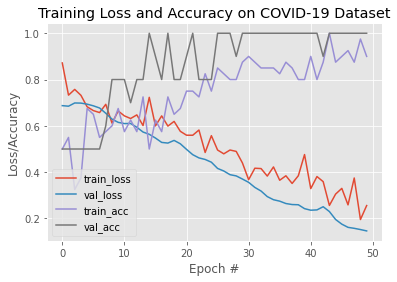

In [4]:
# load the VGG16 network, ensuring the head FC layer sets are left
# off
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(32, activation="relu")(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

print(model.summary())

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

# serialize the model to disk
print("[INFO] saving COVID-19 detector model...")
model.save(MODEL, save_format="h5")